


# Returns




I this section we define what are returns, which is the key variable of analysis in finance (and this class)


* * *
 * Return distributions and moments of a return distribution
 * Annualization of returns
 * Log returns
 * Excess returns and risk premiums
 * Variances and Covariances


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])

Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 1963-02-28 to 2016-12-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RF                647 non-null    float64
 1   MKT               647 non-null    float64
 2   USA30yearGovBond  647 non-null    float64
 3   EmergingMarkets   647 non-null    float64
 4   WorldxUSA         647 non-null    float64
 5   WorldxUSAGovBond  646 non-null    float64
dtypes: float64(6)
memory usage: 35.4 KB


In [3]:
Data.head()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,NaN
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


##  Distribution of Returns

Lets start by looking at the moments of the distribution of returns for the "market" portfolio

This is really the portfolio of all the stocks listed in the United States

To be more precise, it is the value-weighted basket of these stocks



### What does value weighted mean?

$$w_{i,t}=\frac{Price_{i,t}*NShares_{i,t}}{\sum_{i=1}^I Price_{i,t}*NShares_{i,t}}$$

What is $i$ and $I$?

### Mean and Standard Deviation

In [4]:
# looking at it's mean
Data['MKT'].mean()*100

# what does this number mean?

0.9051777434312205

In [6]:
# looking at the market standard deviation

Data['MKT'].std()*100

# what does this number mean?

4.400314890674189

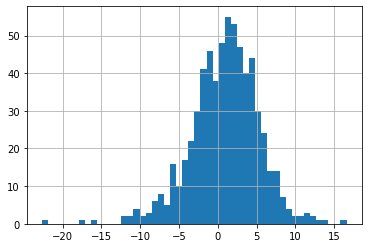

In [10]:
# to have a sense of what that means lets look at the histgram of the distribution of returns

(Data.MKT*100).hist(bins=50)

# what do we see?

# # centered around the mean, the amount of variation around the center is captured by the standard deviation

In [11]:
(0.9-22)/4.4

-4.795454545454545

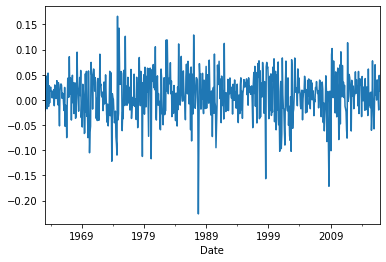

In [12]:
Data.MKT.plot()

### Random variables

* We think of the return realization, the numbers plotted above, as a random variable, i.e., a variable that we are uncertain about it's realization. 

* Random variable is any thing that we don’t known

  * Outcome of dice throw, value of stock market in the end of the day, …
  * For example a dice outcome is a random variables with the following possible outcomes: (1,2,3,4,5,6)

* This uncertainty is fully described by the probability distribution associated with the random variable.



### What is a probability distribution?

* A probability distribution describes the probability that each outcome is realized.
* It can be described by a Probability Density Function (pdf).
* For example, the pdf of a dice is (1,1/6) ,(2,1/6), (3,1/6), (4,1/6), (5,1/6), (6,1/6)
* It can also be described by the Cumulative Density Function(cdf)
* For a example, the cdf of a dice is (1,1/6) ,(2,2/6), (3,3/6), (4,4/6), (5,5/6), (6,6/6)
* A pdf or cdf fully describes the uncertainty we have with respect to a particular random variable
* Random variable is any thing that we don’t known
* Outcome of dice throw, value of stock market in the end of the day, …


### Moments

* One way to summarize the information in a probability distribution is the moments

* Mean or expected value $E[𝑥]=∑𝑥_𝑖 𝑃𝑟𝑜𝑏(𝑥=𝑥_𝑖 )$  𝑜𝑟 $∫𝑥𝑓(𝑥)𝑑𝑥$  often uses µ as symbol

* The Variance $𝑣𝑎𝑟(𝑥)= ∑(𝑥_𝑖−𝐸[𝑥])^2 𝑃𝑟𝑜𝑏(𝑥=𝑥_𝑖 )$    𝑜𝑟 $∫(𝑥_𝑖−𝐸[𝑥])^2 𝑓(𝑥)𝑑𝑥 $ 
  
  * (Standard deviation $std(x)= \sqrt{𝑣𝑎𝑟(𝑥)}$)
  * measures average variability around the mean across successive drawings of x.
  * often use 𝜎 as a symbol for standard deviation and $𝜎^2$ for variance

* Skewness $𝑠𝑘𝑒𝑤(𝑥)= ∑(𝑥_𝑖−𝐸[𝑥])^3 𝑃𝑟𝑜𝑏(𝑥=𝑥_𝑖 )$ 𝑜𝑟 $∫(𝑥_𝑖−𝐸[𝑥])^3 𝑓(𝑥)𝑑𝑥$
  
  * Measures asymmetry in the distribution

* Kurtosis $𝑘𝑢𝑟𝑡(𝑥)= ∑(𝑥_𝑖−𝐸[𝑥])^4 𝑃𝑟𝑜𝑏(𝑥=𝑥_𝑖 )$ 𝑜𝑟 $∫(𝑥_𝑖−𝐸[𝑥])^4 𝑓(𝑥)𝑑𝑥$ 

  * Measures how fat the tails are

* Higher order moments…

* Observation: with enough moments you can represent any distribution, but in practice you only need a few
  
  * for example for the normal distribution you only need the first two: Expected value and variance!

### Sample moments

* Moments are  **never** truly known in real data

* Must be always estimated from some sample of the data

* We would like to know the "population" moments, i.e., the moments that describe how the population is generated

* For example to get the expected return on the market, i.e. it's population mean, we use the sample mean

$$\overline{R_{MKT}}=\frac{\sum_{t=1}^TR_{MKT}}{T}$$

* where T is the sample size
* we also call the sample average

* Note that each observation in the sample is weighted  equally by the frequency of the **realized** observations

* For population means they are weighted by the **expected** frequency, i.e. the probabilities

### Are returns normal?

* Most of what we do does not depend on the assumption of normality

* But normal distributions are very useful in statistical tests

* And they are also not a bad approximation for return data at low frequency (monthly/year) 


### The Normal distribution

* Probability that any random draw form a Normal distribution random variable $\tilde{x}$ is within $n=1$ standard deviation from the mean is 0.6826


$$Prob(E[\tilde{x}]-n\sigma(\tilde{x})\leq \tilde{x}\leq E[\tilde{x}]+n\sigma(\tilde{x}))|_{n=1})=0.6826$$

* $n=2,Prob(\cdot)=0.9550$

* it is convenient to to transform a normally distributed r.v. into units of standard deviations from it's mean


$$\tilde{z}=\frac{\tilde{x}-E[\tilde{x}]}{\sigma(\tilde{x})}$$

* This follows the "standard" normal distribution, which has mean 0 and and standard deviation 1 

* can you show that is indeed the case that z has mean zero and standard devaiton 1? 

* This means that the normal distribution is completely characterized by it's first two moments

* This means that the investment problem is much more tractable too!

* Only two moments to worry about:

    * The expected return of the portfolio
    
    * it's variance
    
    * The probability of really bad tail events will follow immediately from these two! 

### What is a return?

* So we know what the normal distribution is

* but what exactly is a return?

* Lets say you paid $𝑃_𝑡$ in date $t$ for a stock

* In date $t+1$ the price is $𝑃_{𝑡+1}$  and you earn some dividend as well $𝐷_{𝑡+1}$

* Then we say that your return is

$$𝑅_{𝑡+1}=\frac{𝑃_{𝑡+1}+𝐷_{𝑡+1}−𝑃_𝑡}{𝑃_𝑡}$$

* It is the gain you made, divided by how much you put in

> Our data set Data contains these returns of buying an asset, earning any distributed dividends during the month, and then selling in the end of the month.

>As we will see, the return on a portfolio is just a weighthed average of the returns of the individual assets


### How to evaluate whether returns are normal?


The standard approach is to look at higher moments.

Because the normal is entired descibed by the first two moments, looking at these higher moments can give us a clue if that is really true for the data at hand.

Here are a few:

* Skewness 

* Kurtosis 

* Frequency of extreme return realizations 

  * 3 sigma events should almost never happen for a normal random variable
  
  * once every 500 periods

  $$PROB(|R-E{R}|>3\sigma(R))$$


 A nice thing to do is to simulate data generated by a normal with same sample mean and standard deviation as the normal, and compare it with the actual data

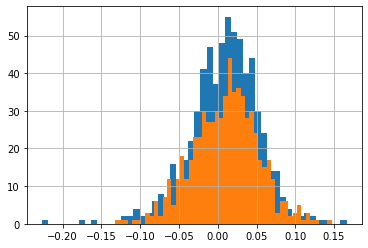

In [21]:
# lets look at a simulation to see this more clearly


mu=Data.MKT.mean()
std=Data.MKT.std()
T=Data.MKT.count()
X=pd.Series(np.random.normal(mu,std,T))

Data.MKT.hist(bins=50)


# what happens if we increase the mean?

# what happens if we increase the standard deviation?

# for the same standard mean and standard deviation what do you notice when you compare the real data and the simulated data?



In [22]:
# To evaluate how close a distribution is to the normal distribution we typically look at

# skewness

[Data.MKT.skew(), X.skew()]


[-0.5053783766354294, -0.11814774419178325]

In [23]:
# To evaluate how close a distribution is to the normal distribution we typically look at

# kurtosis
[Data.MKT.kurtosis(),X.kurtosis()]


[1.9881305187934846, 0.2796480959378349]

In [51]:
# To evaluate how close a distribution is to the normal distribution we typically look at

# how many observations in the read data is below several number of standard devations of the mean
X=pd.Series(np.random.normal(mu,std,T))
threshold=4
# counts for the real data
A=((Data.MKT-Data.MKT.mean())<-threshold*Data.MKT.std())
# counts for simulated data (which we know it is normal!)
B=((X-X.mean())<-threshold*X.std())

[A.sum(),B.sum()]



[2, 0]

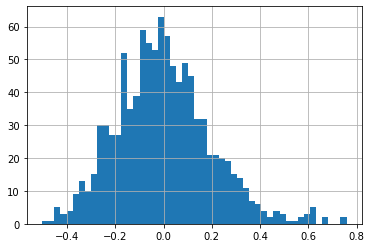

In [32]:
kurt=np.zeros(1000)
for i in range(0,1000):
    X=pd.Series(np.random.normal(mu,std,T))
    kurt[i]=X.kurtosis()
    


pd.Series(kurt).hist(bins=50)

### Log returns (also called continously compounded returns) and Simple returns

#### Log returns

Insight: If innovations in log returns are iid then, log returns at long enough horizons must be normal (Central Limit Theorem)

$$1+𝑅_{1→𝑇}=((1+𝑅_1 )(1+𝑅_2 )…(1+𝑅_𝑇))⁡\\
ln⁡(1+𝑅_{1→𝑇} )=ln⁡((1+𝑅_1 )(1+𝑅_2 )…(1+𝑅_𝑇 ))\\
ln⁡(1+𝑅_{1→𝑇} )=ln⁡(1+𝑅_1 )+ln⁡(1+𝑅_2 )+…+ln⁡(1+𝑅_𝑇 )\\
                    𝑟_{1→𝑇}=𝑟_1+𝑟_2+…+𝑟_𝑇 $$ 



* Thus, if T is large, $𝑟_{1→𝑇}$ will be approximately normally distributed. (central limit theorem)

* $𝑟_𝑡=ln⁡(1+𝑅_𝑡 )$ is the rate of return assuming continuous compounding for the period t.

* This turns out to hold up well if you look at horizons longer than a month, but does not work at all at daily frequency (much fatter left tail than the normal distribution predicts)


* Log returns are also very convenient when thinking about long-term investing

In [33]:
print([np.log(1+Data.MKT).skew(),X.skew()])

print([np.log(1+Data.MKT).kurtosis(),X.kurtosis()])

[-0.7707864524331097, -0.10212480191113225]
[2.859221702344219, -0.17043746558020745]


#### How to go back and fourth between log and simple returns?

Let R be a simple net return per period, i.e., if you invest 10 , you get 10(1+R) in the end of the period

R is a number like 5% (0.05)

We say 1+R, a number like 1.05 is a gross return. 

Why gross? Because it includes 1, your initial investment.

* To get log returns: $r=log(1+R)$


* To get back simple returns: $R=exp(r)-1$

In [34]:
r=np.log(1+Data.MKT)
R=np.exp(r)-1
pd.concat([R,Data.MKT],axis=1).head()

,MKT,MKT
Date,,
1963-02-28,-0.0215,-0.0215
1963-03-31,0.0331,0.0331
1963-04-30,0.0476,0.0476
1963-05-31,0.0200,0.0200
1963-06-30,-0.0177,-0.0177


In [35]:
threshold=3
# now real data in log returns

A=((np.log(Data.MKT+1)-np.log(Data.MKT+1).mean())<-threshold*np.log(Data.MKT+1).std())
B=((X-X.mean())<-threshold*X.std())
[A.sum(),B.sum()]

[4, 0]

#### Why we might care about deviations from normality?

## Risk, Variances, and Covariances

In this section we will learn how to calculate the volatility of a portfolio and the covariance between portfolios, and use these concepts to help us understand if adding another portfolio is more risky or not.

### Volatility and Variance

We know how to compute variance and what they are

$$Data.MKT.std()=\sqrt{\sum_{t=1}^T\frac{(R_{MKT,t}-\overline{R_{MKT}})^2}{T}}$$

where $\overline{R_{MKT}}=\sum_{t=1}^T\frac{R_{MKT,t}}{T}$ is the sample mean.


So for each series we get a number. We oftern refer to the standard deviation as the "vol" or the volatility of an asset.

Variance and volatility have the same content, but volatility is in the same unit as returns, and not square returns, so it easier (for me!) to have intuition about what it means.

For example, if the market has a vol of 30% per year, and if the market return is assumed to be normally distributed, I know that there is about a 2.5% probability that I will loose 60% of my investment by the end of the year!

So it is a great gauge of risk...at least at the portfolio level

But when thinking about a specific stock, it's volatility means very little

Unless your entire portfolio is just that stock, you don't really need to bear the stock risk--if you have 1% in a stock and the stock drops 20%, that is only 0.2% in your portfolio. You will not even notice the change.



## But what risk should you care about? What stock should be risky for you?

The great insight from Harry Markowitz was to think of risk in terms of what the stock adds to your portfolio

Just like meat can be good for you if you are not eating any meat, it is terrible if you are eating a lot of it

What investors should care about is, just like eaters, their final diet. If a given stock brings a lot of what you already have, it will be bad for you, i.e., risky.

The way to measure this degree of commonality between your portfolio and this particular stock is the covariance


$$Cov(R_{i,t},R_{j,t})={\sum_{t=1}^T\frac{(R_{i,t}-\overline{R_{i}})(R_{j,t}-\overline{R_{j}})}{T}}$$


The Covariance matrix of a set of stocks is the matrix where cell $(i,j)$ has the covariance between asset $i$ and asset $j$:

In [67]:
# here for two assets
Data[['MKT','WorldxUSA']].cov()

,MKT,WorldxUSA
MKT,0.001936,0.001255
WorldxUSA,0.001255,0.002175


note that the diagonal cell $(i,i)$ has the covariance between asset $i$ and asset $i$, which is just the variance of asset $i$

In [68]:
Data[['MKT','WorldxUSA']].var()

MKT          0.001936
WorldxUSA    0.002175
dtype: float64

In [76]:
Data

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,NaN
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139
...,...,...,...,...,...,...
2016-08-31,0.0002,0.0052,-0.008417,0.025186,0.000838,-0.009552
2016-09-30,0.0002,0.0027,-0.016417,0.013153,0.012736,0.009979
2016-10-31,0.0002,-0.0200,-0.049460,0.002474,-0.020383,-0.043476


In [80]:
Data.index[0]

Timestamp('1963-02-28 00:00:00')

In [81]:
Data.drop(Data.index[0])

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139
1963-07-31,0.0027,-0.0012,0.003400,0.088591,0.007900,0.001901
...,...,...,...,...,...,...
2016-08-31,0.0002,0.0052,-0.008417,0.025186,0.000838,-0.009552
2016-09-30,0.0002,0.0027,-0.016417,0.013153,0.012736,0.009979
2016-10-31,0.0002,-0.0200,-0.049460,0.002474,-0.020383,-0.043476


In [69]:
# here for all the assets except the risk-free rate

Data.drop('RF',axis=1).cov()


,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
MKT,0.001936,0.000104,0.001280,0.001255,0.000182
USA30yearGovBond,0.000104,0.001226,-0.000211,-0.000017,0.000264
EmergingMarkets,0.001280,-0.000211,0.003544,0.001651,0.000243
WorldxUSA,0.001255,-0.000017,0.001651,0.002175,0.000419
WorldxUSAGovBond,0.000182,0.000264,0.000243,0.000419,0.000407


Another way of looking at this is the correlation matrix, which normalizes the covariances by the volatility of each asset:

$$Corr(R_{i,t},R_{j,t})={\frac{Cov(R_{i,t},R_{j,t})}{\sqrt{Var(R_{i,t})Var(R_{j,t})}}}$$

In [82]:
Data.drop('RF',axis=1).corr()

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
MKT,1.000000,0.067779,0.488753,0.611369,0.204491
USA30yearGovBond,0.067779,1.000000,-0.101321,-0.010180,0.373123
EmergingMarkets,0.488753,-0.101321,1.000000,0.594653,0.202565
WorldxUSA,0.611369,-0.010180,0.594653,1.000000,0.444938
WorldxUSAGovBond,0.204491,0.373123,0.202565,0.444938,1.000000


* What is noteworthy about these relationships?

* What is safer for an US investor? US bond portfolio or World bond portfolio?

* What is safer for an international investor? US bond portfolio or World bond portfolio?

* Why did I drop the risk-free rate to make these calculations?

* In what sense the rate of return of the risk-free rate is different from the rate of return of these other assets?


In [83]:
Data.corr()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
RF,1.000000,-0.020509,0.033045,-0.018564,0.000015,0.073384
MKT,-0.020509,1.000000,0.067779,0.488753,0.611369,0.204491
USA30yearGovBond,0.033045,0.067779,1.000000,-0.101321,-0.010180,0.373123
EmergingMarkets,-0.018564,0.488753,-0.101321,1.000000,0.594653,0.202565
WorldxUSA,0.000015,0.611369,-0.010180,0.594653,1.000000,0.444938
WorldxUSAGovBond,0.073384,0.204491,0.373123,0.202565,0.444938,1.000000


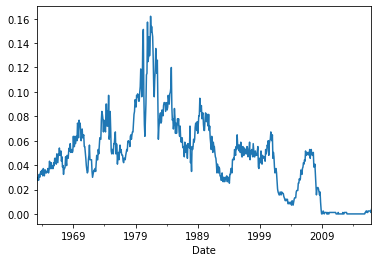

In [84]:
(Data.RF*12).plot()

## Excess returns and risk-premiums


* It is convenient to decompose the return earned in terms of what you earn due to
  1. compensation for waiting (time-value of money)
  2. compensation for bearing risk (risk premium)
 
* To do the decomposition, we will do the following:
  * We first define an "<b>excess return</b>"： the return minus the risk-free rate 
 
 $$R_i^e=R_i-R_f$$
 
  * We typically use the returns of a 3-month treasury bill to measure $R_f$
 
  * So the excess return of the market is

      $$R^e_{MKT}=R_{MKT}-R_f$$

  * i.e. how much more I would get if I invested in the market instead of a short-term risk-free U.S. treasury bond

  * We call the Expected difference, the <b>Risk-Premium</b>

      $$E[R_i^e]=E[R_i-R_f]$$

  * It is how much more you expect to get by investing in asset $i$ instead of the risk-free asset

  * When asset $i$ is the total market portfolio of US equities, we call this, the <b>Equity Risky Premium</b>

* <b>Equity Risky Premium</b>

  $$E[R_{MKT}^e]=E[R_{MKT}-R_f]$$


In [62]:
(Data.MKT-Data.RF).mean()

0.005140340030911903

In [63]:
(Data.MKT-Data.RF).mean()*12

0.06168408037094284

What does this mean?

Lets look at how much money one would have if they had invested 1 dollar in the market and kept reinvesting until the end of our sample

lets then compare with an investment in the risk-free rate

$$(1+r_1)(1+r_2)....(1+r_T)$$

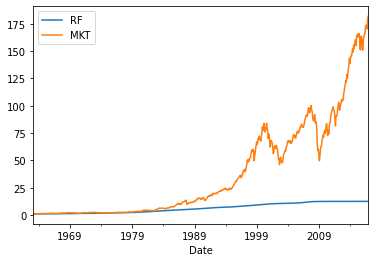

In [64]:
(1+Data[['RF','MKT']]).cumprod().plot()

This means that someone that invested 1 dollar in the market in 63, would have 182 dollars today.

A tota return of 182/1-1=18,100\%

If you invested in the risk-free rate you would have

12.5/1-1= 1,150\% which is a bit above the inflation in this same period

In [66]:
(1+Data[['RF','MKT']]).cumprod().tail(1)
(1+Data[['RF','MKT']]).prod()

RF      12.472682
MKT    181.954557
dtype: float64